## Import libraries

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#from sklearn import datasets, linear_model
#from sklearn.model_selection import train_test_split


## Read the necessary data

In [63]:
consumption = pd.read_csv('../cleaned_data/consumption.csv')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv')

consumption = consumption.T
header = consumption.iloc[0]
consumption =consumption[1:]
consumption.rename(columns =header,inplace=True)
consumption.insert(0,'year', consumption.index)
consumption.reset_index(drop =True, inplace=True)


In [102]:
def regression(Y):
    #Y energetic information about country
    X = sm.add_constant(consumption.year)
    model = sm.OLS(Y,X)
    results = model.fit()
    #Provide a summary of statistics
    #print(results.summary())
    return(results.params)


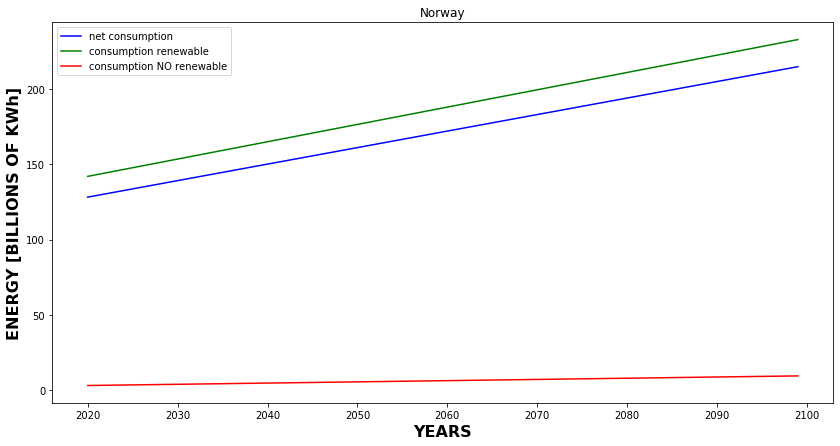

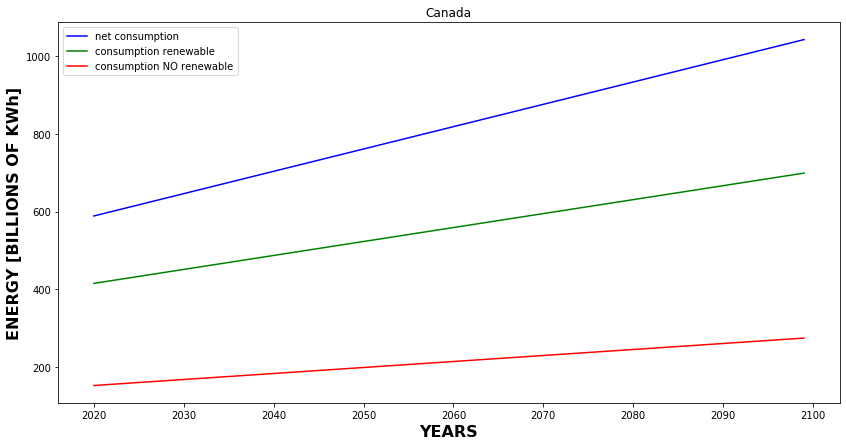

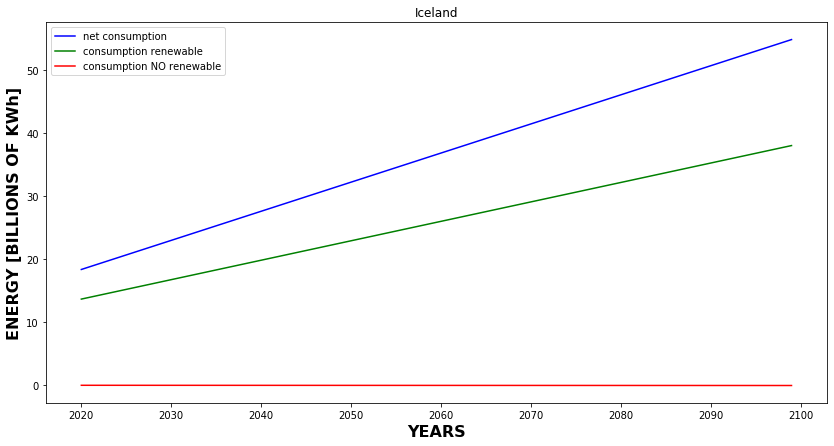

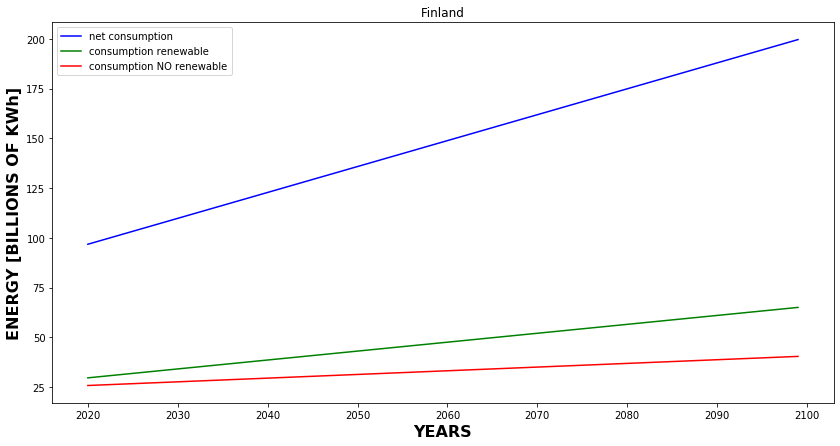

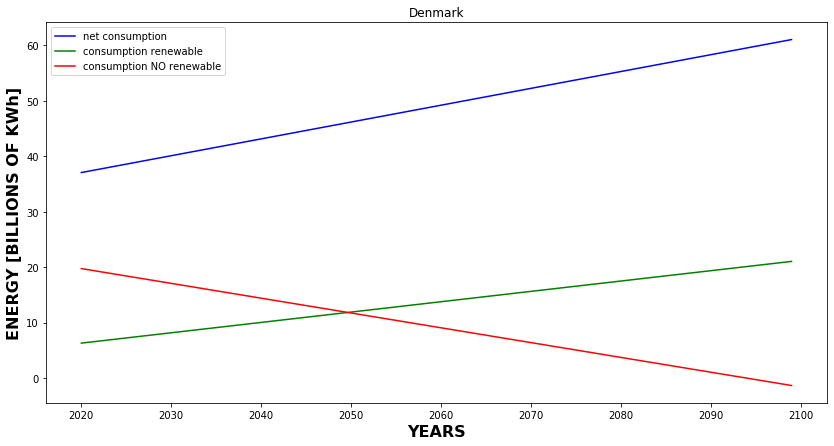

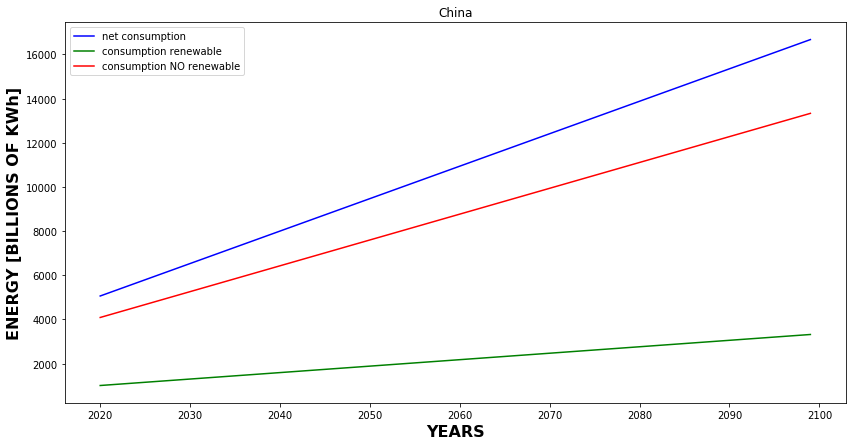

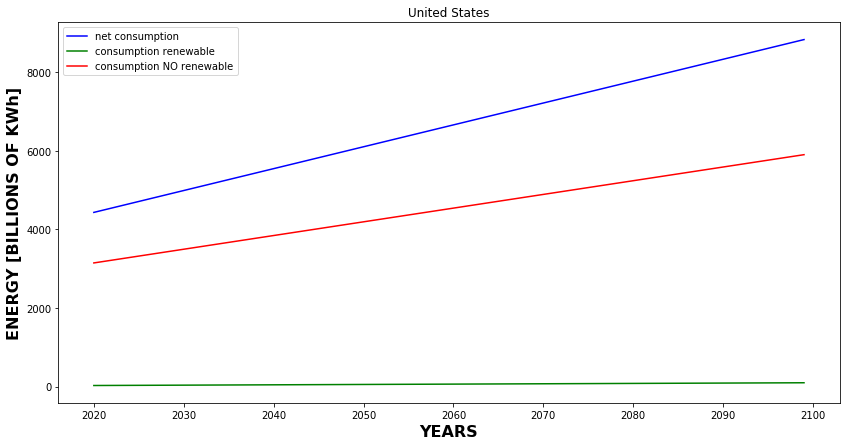

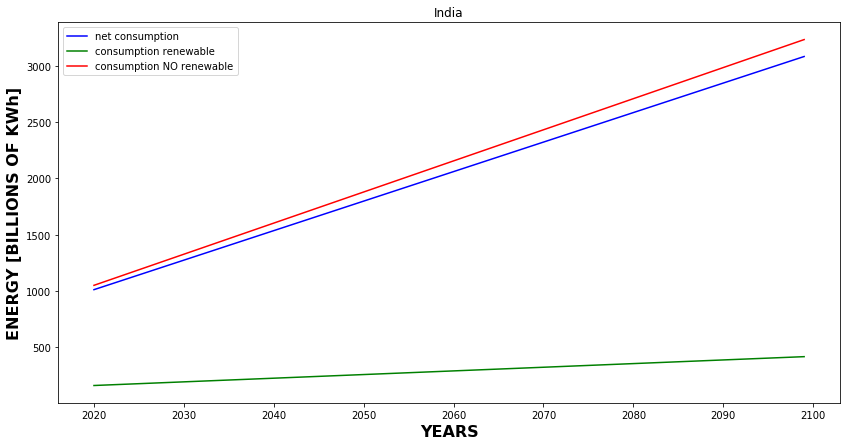

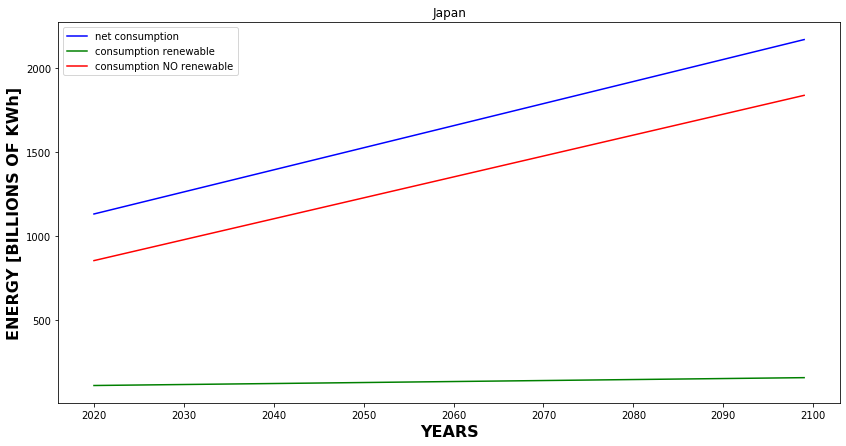

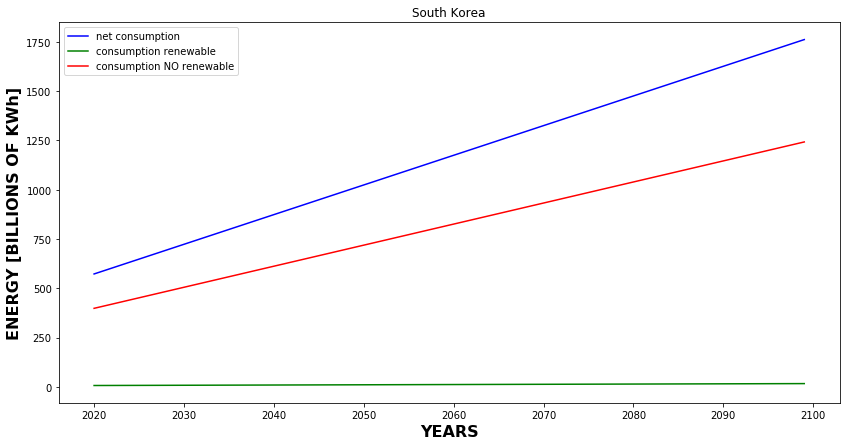

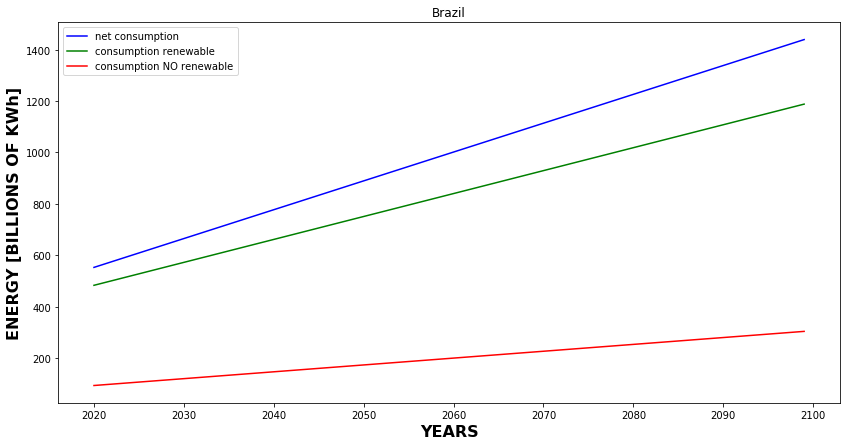

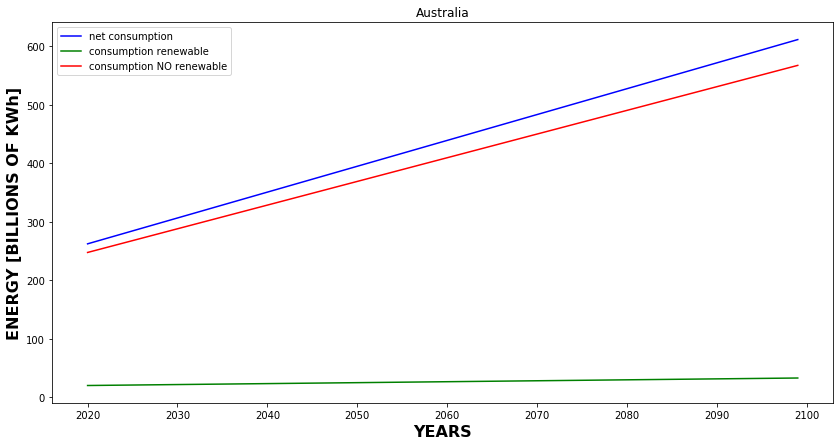

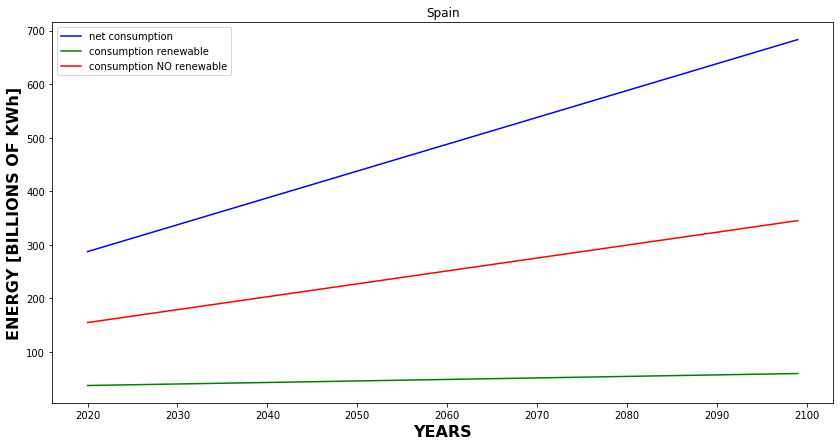

In [100]:
countries_all = consumption.columns[1:]
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])

country = 'Iceland'

for country in countries:
    con = regression(Y=consumption[country])
    GRE = regression(Y=generation_renewable[country])
    GNRE = regression(Y=generation_norenewable[country])


    t = np.arange(2020,2100,1)
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,(t*con[1]+con[0]), 'b', label= 'net consumption')
    plt.plot(t,(t*GRE[1]+GRE[0]), 'g', label= 'consumption renewable')
    plt.plot(t,(t*GNRE[1]+GNRE[0]), 'r', label= 'consumption NO renewable')


    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('ENERGY [BILLIONS OF KWh]',fontsize=16,fontweight='bold')
    plt.title(country)
plt.show()

In [ ]:

t = np.arange(2020,2100,1)
fig,ax = plt.subplots(1, figsize=(14,7))
plt.plot(t,(t*con[1]+con[0]), 'b', label= 'consumption renewable')
plt.plot(t,(t*GRE[1]+GRE[0]), 'g', label= 'consumption renewable')
plt.plot(t,(t*GNRE[1]+GNRE[0]), 'r', label= 'consumption renewable')

plt.show()

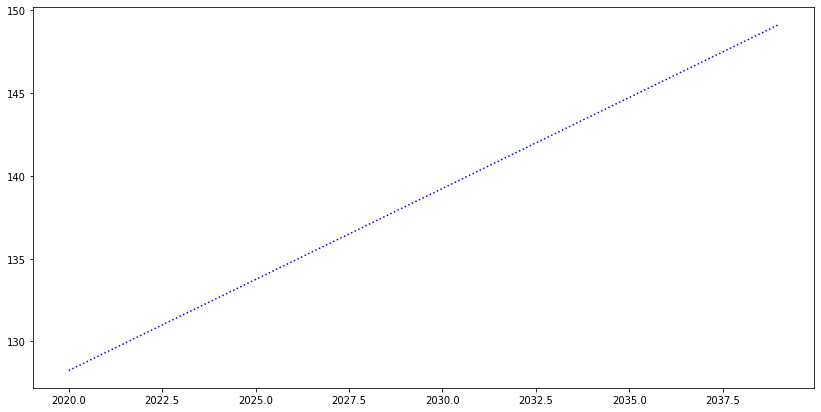

In [41]:
t = np.arange(2020,2040,1)
fig,ax = plt.subplots(1, figsize=(14,7))
plt.plot(t,(t*results.params[1]+results.params[0]), 'b:', label= 'consumption renewable')
plt.show()

In [23]:
consumption.Afghanistan[0]

0.8760600000000001

In [24]:
consumption_model_X = consumption.Norway[1:]
consumption_model_y = consumption.Norway[0]


In [26]:
X_train.shape

(30,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split( consumption_model_X, consumption_model_y, test_size=0.20, random_state=42)


TypeError: Singleton array 75.112 cannot be considered a valid collection.

In [21]:
consumption_model.fit(X_train, y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[109.154   104.516   104.129    94.846   103.945   100.21885 110.449
  95.189   118.431    75.112   113.351    91.946    99.716    78.076
 122.226   115.491    78.1     112.506   119.688    83.115   116.661
 103.759   114.557    97.448   109.594   110.537   112.976    93.863
 102.558   115.653  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:

# The coefficients
print(f'''
Coefficients:{consumption_model.coef_}

length coefficient: {len(consumption_model.coef_)}




intercept:{consumption_model.intercept_}

type of intercept: {type(consumption_model.intercept_)}
''')



Coefficients:[ 1.21931597e-02  1.00694327e-04  5.06501099e-03 -2.78140798e-03
 -2.89795067e-05  3.33821869e-03  2.03579496e-06  3.50536878e-05
 -8.10791687e-03  3.12575134e-02 -2.15426077e-02 -5.88504379e-03
 -5.85524623e-04  8.94800947e-05 -7.31664181e-03  4.54506555e-05
  3.23393164e-06  2.67095242e-04  4.52519524e-04  8.15220377e-04
  7.25822520e-04  1.12721966e-02  5.87136403e-05 -1.02494713e-03
  1.99131875e-02  1.07036870e-04  1.25141967e-04  6.13626206e-04
  2.46742697e-03 -2.65723611e-03 -1.78575361e-05  7.20168845e-05
 -1.26927612e-04  2.88000490e-05 -1.46384979e-02 -1.03585851e-03
 -3.22854039e-03 -2.51336069e-05  8.93827596e-04  2.93254744e-03
 -5.14379477e-06  3.87005214e-03  2.98036075e-03  7.13934514e-03
  1.73743820e-03  8.87345992e-03  1.48699339e-04 -4.35337723e-06
  3.59781552e-03  3.29947862e-03  8.09927305e-05 -2.09949868e-04
  4.13121909e-05  1.51176452e-03 -1.15881113e-05 -9.89597575e-06
 -4.09663590e-05  2.43608893e-03  1.01679832e-02  8.14185011e-04
 -7.4784085